# Contents
1. Imports
2. Checks
3. Wrangling
4. Time Series Analysis - Round One
5. Time Series Analysis - Round Two
6. Time Series Analysis - Round Three

# 1. Imports

In [1]:
# Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime
from pylab import rcParams
import quandl

In [ ]:
# Path
path = r'/Users/davidgriesel/Documents/GitHub/06_coffee_quality_modelling'

In [ ]:
# Dataset
df_quality = pd.read_pickle(os.path.join(path, 'data', 'original', 'psd_coffee.csv'), index_col = False)

##### Source: [Kaggle](https://www.kaggle.com/datasets/parasrupani/coffee-distribution-across-94-counties/data)

In [4]:
# Configure plot display
%matplotlib inline 

# Configure columns and rows
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

# Configure API key 
quandl.ApiConfig.api_key = '2UEuvTWPzkSudQRVH4UY'

# 2. Checks

In [5]:
# Dimensions
df_production.shape

(6016, 21)

In [6]:
# Preview
df_production.head()

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Other Production,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
0,Albania,1960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Albania,1961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Albania,1962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Albania,1963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Albania,1964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 3. Wrangling

## 3.1. Dropping columns

In [7]:
df_production.columns

Index(['Country', 'Year', 'Arabica Production', 'Bean Exports', 'Bean Imports',
       'Beginning Stocks', 'Domestic Consumption', 'Ending Stocks', 'Exports',
       'Imports', 'Other Production', 'Production', 'Roast & Ground Exports',
       'Roast & Ground Imports', 'Robusta Production',
       'Rst,Ground Dom. Consum', 'Soluble Dom. Cons.', 'Soluble Exports',
       'Soluble Imports', 'Total Distribution', 'Total Supply'],
      dtype='object')

In [8]:
# Remove columns
df_production_1 = df_production[['Year', 'Country', 'Arabica Production']]

In [9]:
# Dimensions
df_production_1.shape

(6016, 3)

In [10]:
# Confirm
df_production_1.head()

,Year,Country,Arabica Production
0,1960,Albania,0
1,1961,Albania,0
2,1962,Albania,0
3,1963,Albania,0
4,1964,Albania,0


## 3.2. Renaming columns

In [11]:
# Copy dataframe
df_production_2 = df_production_1.copy()

# Change '.' to '_'
df_production_2.rename(columns = {'Arabica Production': 'Production'}, inplace = True)

In [12]:
# Column names
df_production_2.columns

Index(['Year', 'Country', 'Production'], dtype='object')

## 3.3. Subsetting

In [13]:
# Frequency 'Year
df_production_2['Year'].value_counts(dropna = True)

Year
1960    94
1961    94
1994    94
1995    94
1996    94
1997    94
1998    94
1999    94
2000    94
2001    94
2002    94
2003    94
2004    94
2005    94
2006    94
2007    94
2008    94
2009    94
2010    94
2011    94
2012    94
2013    94
2014    94
2015    94
2016    94
2017    94
2018    94
2019    94
2020    94
2021    94
2022    94
1993    94
1992    94
1991    94
1975    94
1962    94
1963    94
1964    94
1965    94
1966    94
1967    94
1968    94
1969    94
1970    94
1971    94
1972    94
1973    94
1974    94
1976    94
1990    94
1977    94
1978    94
1979    94
1980    94
1981    94
1982    94
1983    94
1984    94
1985    94
1986    94
1987    94
1988    94
1989    94
2023    94
Name: count, dtype: int64

In [14]:
# Number of countries
df_production_2['Country'].nunique()

94

In [15]:
# Remove records other than 2011 to 2018
df_production_3 = df_production_2[(df_production_2['Year'] >= 2000) & (df_production_2['Year'] <= 2018)]

In [16]:
# Confirm
df_production_3['Year'].value_counts(dropna = True)

Year
2000    94
2010    94
2017    94
2016    94
2015    94
2014    94
2013    94
2012    94
2011    94
2009    94
2001    94
2008    94
2007    94
2006    94
2005    94
2004    94
2003    94
2002    94
2018    94
Name: count, dtype: int64

## 3.4. Data types

In [17]:
# Data types
df_production_3.dtypes

Year           int64
Country       object
Production     int64
dtype: object

## 3.5. Accuracy

In [18]:
# Basic statistics
df_production_3.describe()

,Year,Production
count,1786.00000,1786.000000
mean,2009.00000,892.855543
std,5.47876,4019.550195
min,2000.00000,0.000000
25%,2004.00000,0.000000
50%,2009.00000,0.000000
75%,2014.00000,189.000000
max,2018.00000,49700.000000


In [19]:
# Frequency - Production
df_production_3['Production'].value_counts(dropna = True)

Production
0        1083
25         21
100        13
150        10
35          9
90          9
1           9
30          8
125         8
10          8
140         7
70          7
50          7
1300        6
500         6
400         6
800         5
700         5
1200        5
21          5
600         5
4000        5
20          5
75          5
120         5
135         5
650         4
4100        4
275         4
1050        4
27          4
900         4
850         4
31          4
225         3
1100        3
450         3
40          3
2100        3
4300        3
110         3
750         3
475         3
16          3
950         3
1583        3
95          3
550         3
37          3
1000        3
1925        3
4400        3
3           3
340         3
325         3
45          3
350         3
250         3
85          3
240         3
1570        2
317         2
5000        2
660         2
285         2
41800       2
115         2
1610        2
300         2
266         2
235      

In [20]:
# Frequency - Country
df_production_3['Country'].value_counts(dropna = True)

Country
Albania                     19
Nigeria                     19
Rwanda                      19
Russia                      19
Philippines                 19
Peru                        19
Paraguay                    19
Papua New Guinea            19
Panama                      19
Norway                      19
North Macedonia             19
Nicaragua                   19
Senegal                     19
New Zealand                 19
New Caledonia               19
Morocco                     19
Montenegro                  19
Mexico                      19
Malaysia                    19
Malawi                      19
Madagascar                  19
Liberia                     19
Saudi Arabia                19
Serbia                      19
Algeria                     19
Uganda                      19
Zambia                      19
Yemen (Sanaa)               19
Yemen                       19
Vietnam                     19
Venezuela                   19
Uruguay                     19


## 3.6. Missing values

In [21]:
# Null values
df_production_3.isnull().sum()

Year          0
Country       0
Production    0
dtype: int64

## 3.7. Mixed-type data

In [22]:
# Find mixed type data
for col in df_production_3.columns.tolist():
    weird = (df_production_3[[col]].map(type) != df_production_3[[col]].iloc[0].apply(type)).any(axis = 1)
    if len(df_production_3[weird]) > 0:
        print (col)

## 3.8. Duplicates

In [23]:
# Find duplicates
df_duplicates = df_production_3[df_production_3.duplicated()]

# View subset
df_duplicates

,Year,Country,Production


## 3.9. Group and aggregate

In [24]:
# Group by 'Year' and calculate the mean production
df_production_4 = df_production_3.groupby('Year')['Production'].mean().reset_index()

# Rename column
df_production_4.rename(columns = {'Production': 'Average Production'}, inplace = True)

# Display the result
df_production_4

,Year,Average Production
0,2000,748.531915
1,2001,726.574468
2,2002,908.606383
3,2003,713.404255
4,2004,832.478723
5,2005,753.712766
6,2006,894.914894
7,2007,795.829787
8,2008,911.319149
9,2009,827.489362


## 3.10. Indexing

In [25]:
# Set 'Date' as datetime index 

# Copy dataframe
df_production_5 = df_production_4.copy()

df_production_5['datetime'] = pd.to_datetime(df_production_5['Year'], format='%Y')
df_production_5 = df_production_5.set_index('datetime')
df_production_5.drop(['Year'], axis = 1, inplace = True)

In [26]:
# View results
df_production_5.head()

,Average Production
datetime,
2000-01-01,748.531915
2001-01-01,726.574468
2002-01-01,908.606383
2003-01-01,713.404255
2004-01-01,832.478723


# 4. Time Series Analysis - Round One

## 4.1. Plot the time series

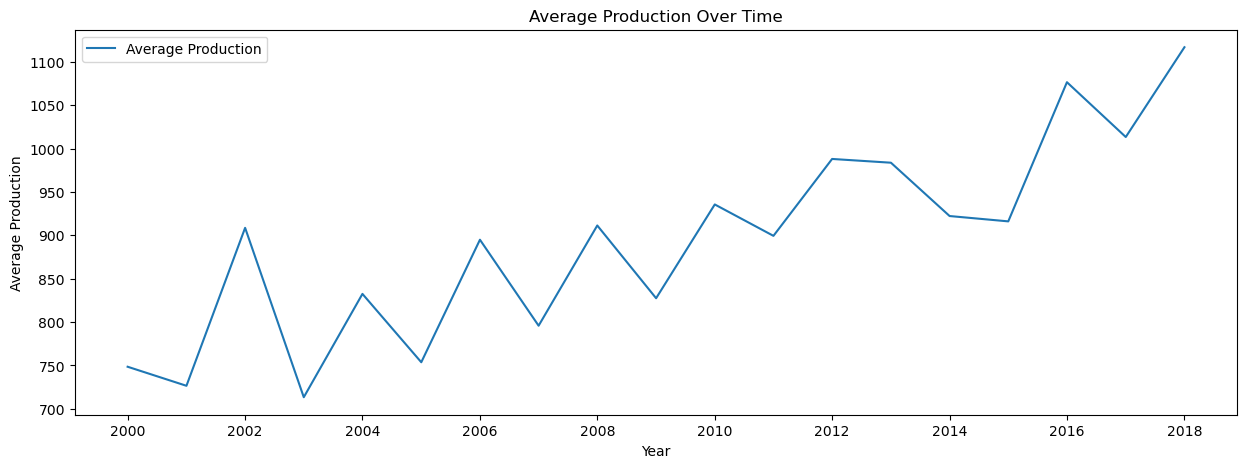

In [27]:
plt.figure(figsize = (15, 5), dpi = 100)

# Specify the column to plot
plt.plot(df_production_5.index, df_production_5['Average Production'], label = 'Average Production')

# Add labels and title
plt.title('Average Production Over Time')
plt.xlabel('Year')
plt.ylabel('Average Production')
plt.legend()

# Show the plot
plt.show()

## 4.2. Decomposition

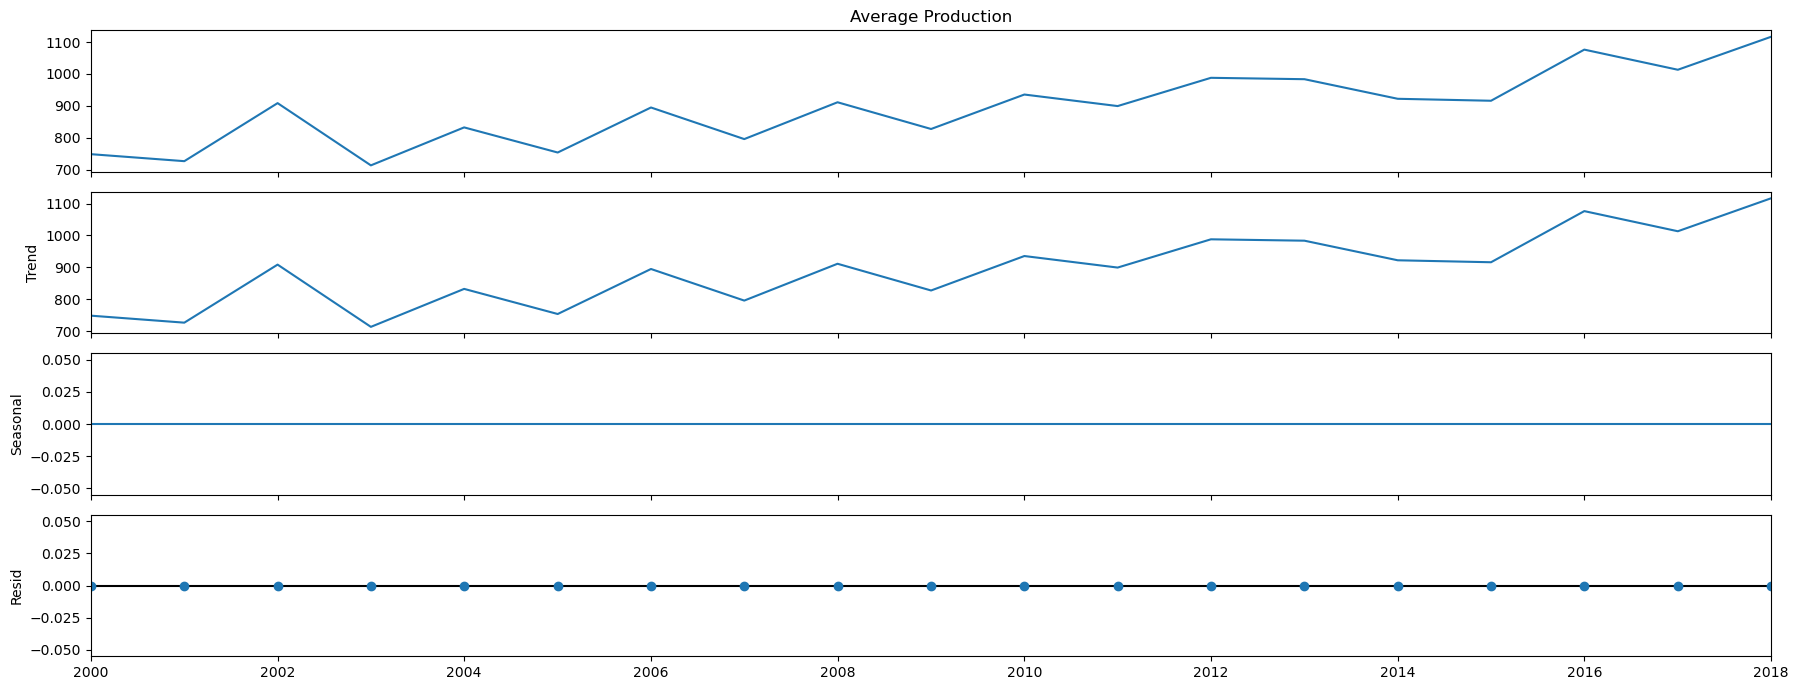

In [28]:
# Decompose time series - additive model
decomposition = sm.tsa.seasonal_decompose(df_production_5['Average Production'], model = 'additive')

# Set the figure size
rcParams['figure.figsize'] = 18, 7

# Plot the decomposition
decomposition.plot()
plt.show()

##### Comments
- The data does not exhibit seasonality or significant noise, but an upward trend over time is visible

## 4.3. Autocorrelation

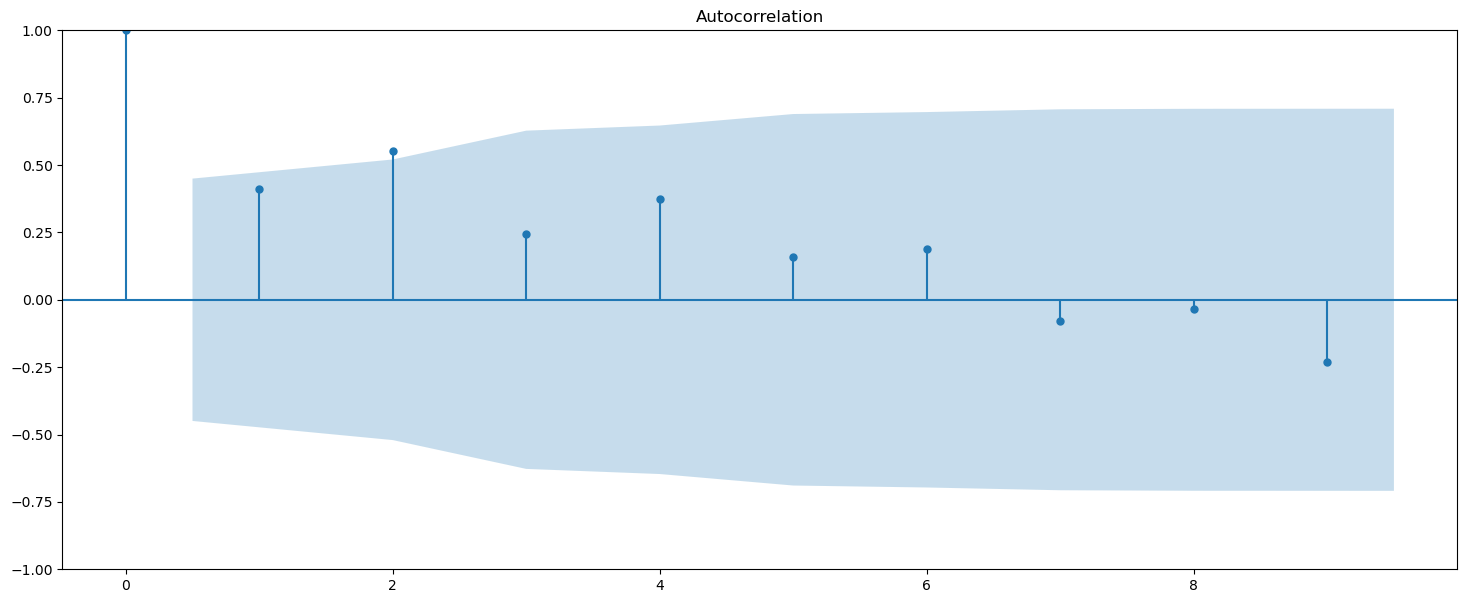

In [29]:
# Plot of autocorrelations
plot_acf(df_production_5)
plt.show()

##### Comments
- The vertical lines extend beyond the 95% confidence level at lag 0 and lag 2, indicating strong correlations that are statistically significant at these lags.

## 4.4. Stationary Testing

In [30]:
# Define the function
def dickey_fuller(timeseries): 

# Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test
dickey_fuller(df_production_5['Average Production'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.257629
p-value                         0.931295
Number of Lags Used             7.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


##### Comments
- At a significance level of 5%, the test statistic is larger than the critical value and the null hypothesis cannot be rejected.
- That there is a unit root in the data, and the data is non-stationary.

## 4.5. Transformation (Stationarising)

In [31]:
## Differencing
df_production_6 = df_production_5 - df_production_5.shift(1)

# Remove missing values
df_production_6.dropna(inplace = True)

# Preview
df_production_6.head()

,Average Production
datetime,
2001-01-01,-21.957447
2002-01-01,182.031915
2003-01-01,-195.202128
2004-01-01,119.074468
2005-01-01,-78.765957


# 5. Time Series Analysis - Round Two

## 5.1. Decomposition

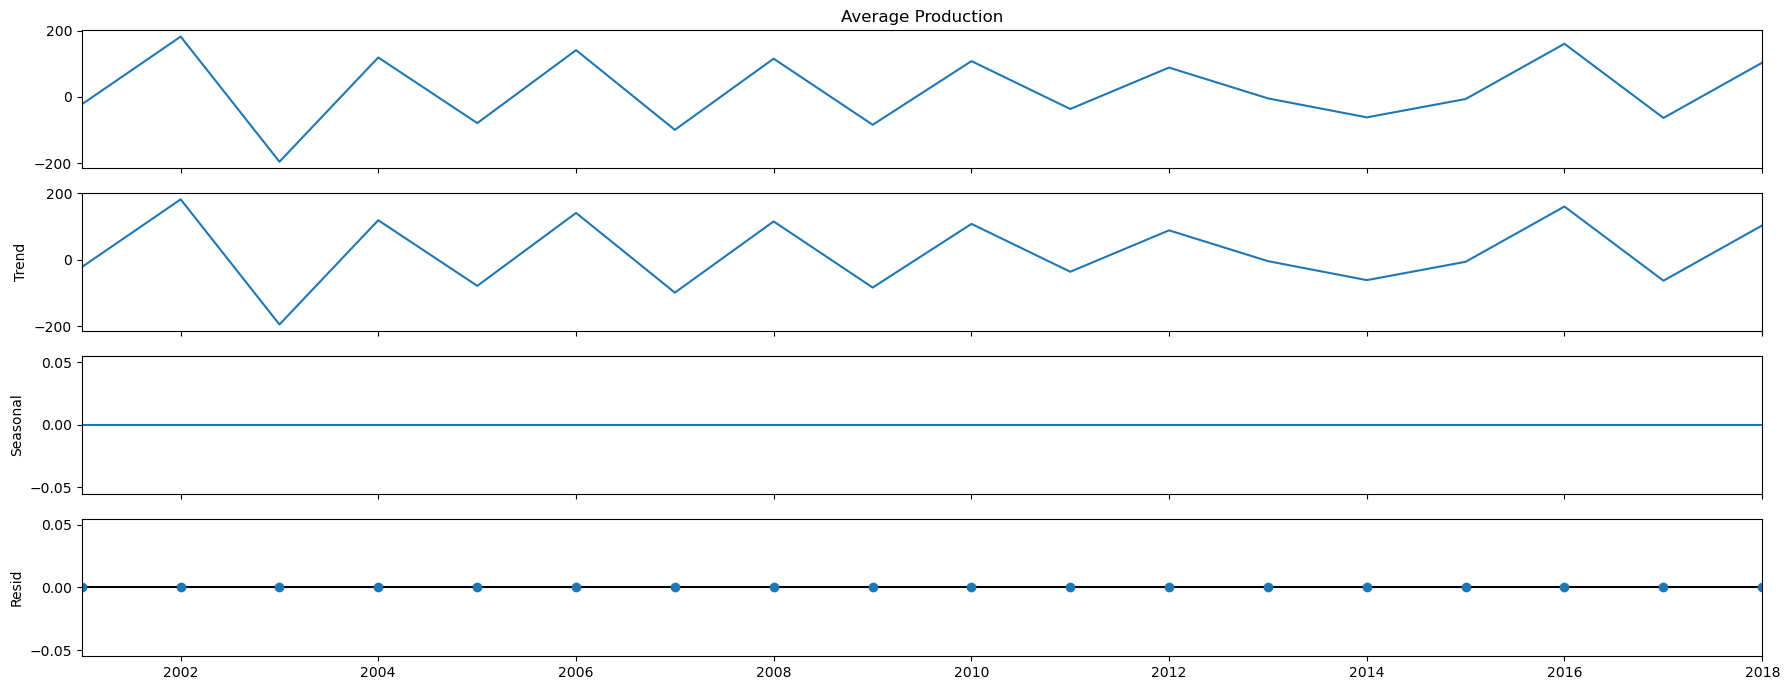

In [32]:
# Decompose time series - additive model
decomposition = sm.tsa.seasonal_decompose(df_production_6['Average Production'], model = 'additive')

# Set the figure size
rcParams['figure.figsize'] = 18, 7

# Plot the decomposition
decomposition.plot()
plt.show()

##### Comments
- The data does not exhibit seasonality or significant noise, and the upward trend over time has been smoothed out.

## 5.2. Autocorrelation

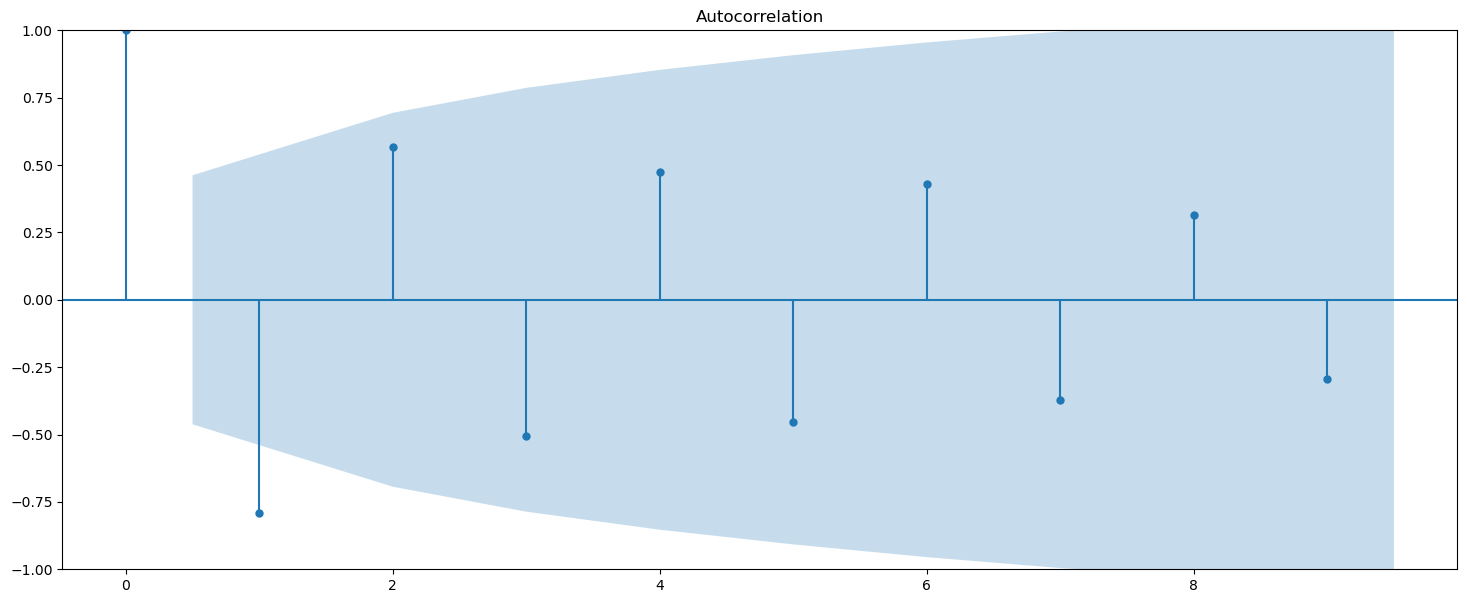

In [33]:
# Plot of autocorrelations
plot_acf(df_production_6)
plt.show()

##### Comments
- The plot indicates reduced autocorrelation but still exists.

## 5.3. Stationary Testing

In [34]:
# Define the function
def dickey_fuller(timeseries): 

# Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test
dickey_fuller(df_production_6['Average Production'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.865132
p-value                         0.049555
Number of Lags Used             4.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


##### Comments
- At a significance level of 5%, the test statistic is still larger than the critical value and the null hypothesis cannot be rejected.
- That there is a unit root in the data, and the data is non-stationary.

## 5.4. Transformation (Stationarising)

# 6. Time Series Analysis - Round Three

In [35]:
## Differencing
df_production_7 = df_production_6 - df_production_6.shift(1)

# Remove missing values
df_production_7.dropna(inplace = True)

# Preview
df_production_7.head()

,Average Production
datetime,
2002-01-01,203.989362
2003-01-01,-377.234043
2004-01-01,314.276596
2005-01-01,-197.840426
2006-01-01,219.968085


## 6.1 Decomposition

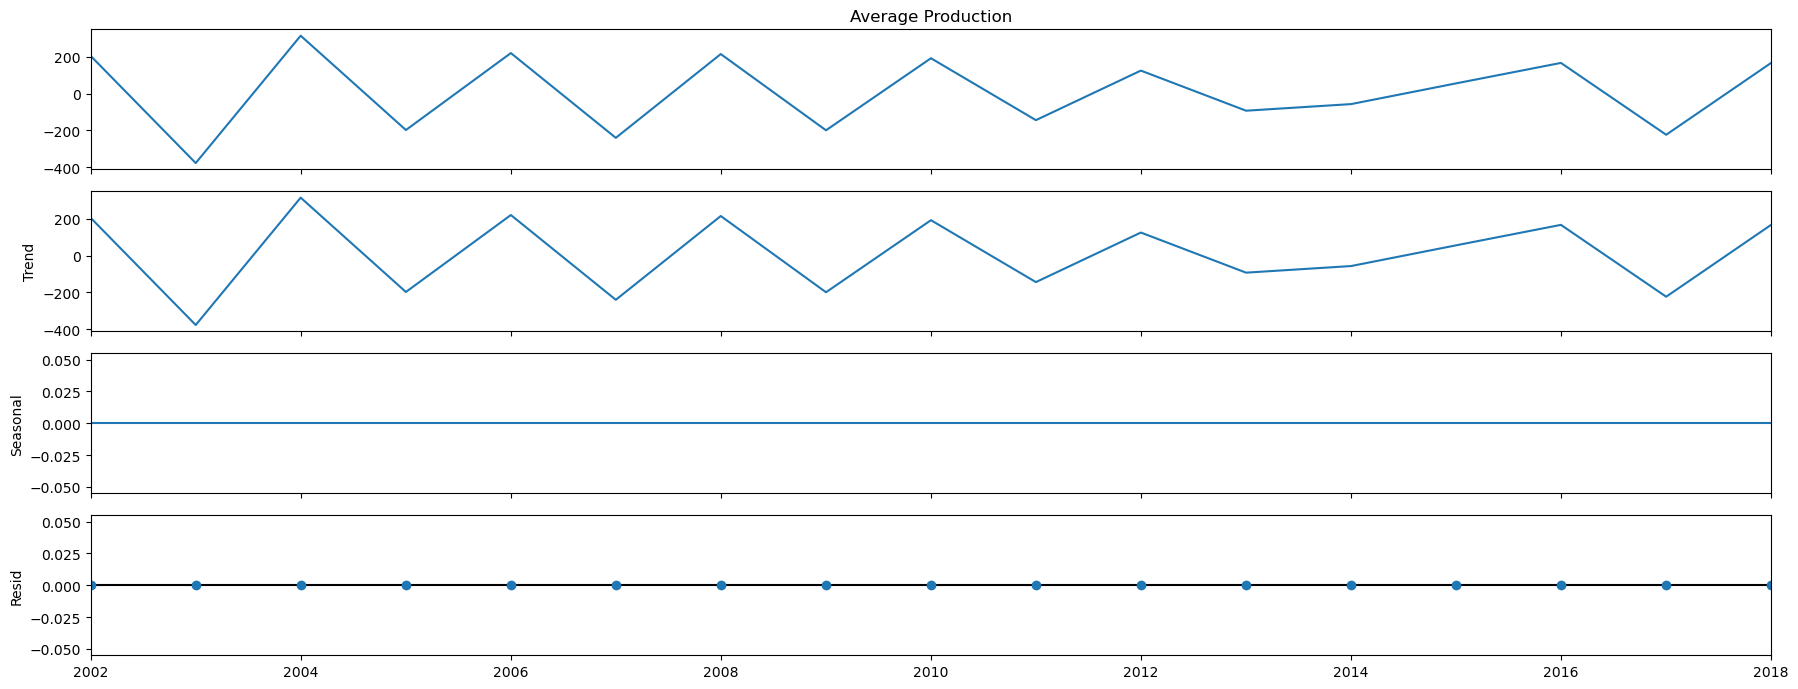

In [36]:
# Decompose time series - additive model
decomposition = sm.tsa.seasonal_decompose(df_production_7['Average Production'], model = 'additive')

# Set the figure size
rcParams['figure.figsize'] = 18, 7

# Plot the decomposition
decomposition.plot()
plt.show()

##### Comments
- The data does not exhibit seasonality or significant noise, and the upward trend over time has been smoothed out.

## 6.2 Autocorrelation

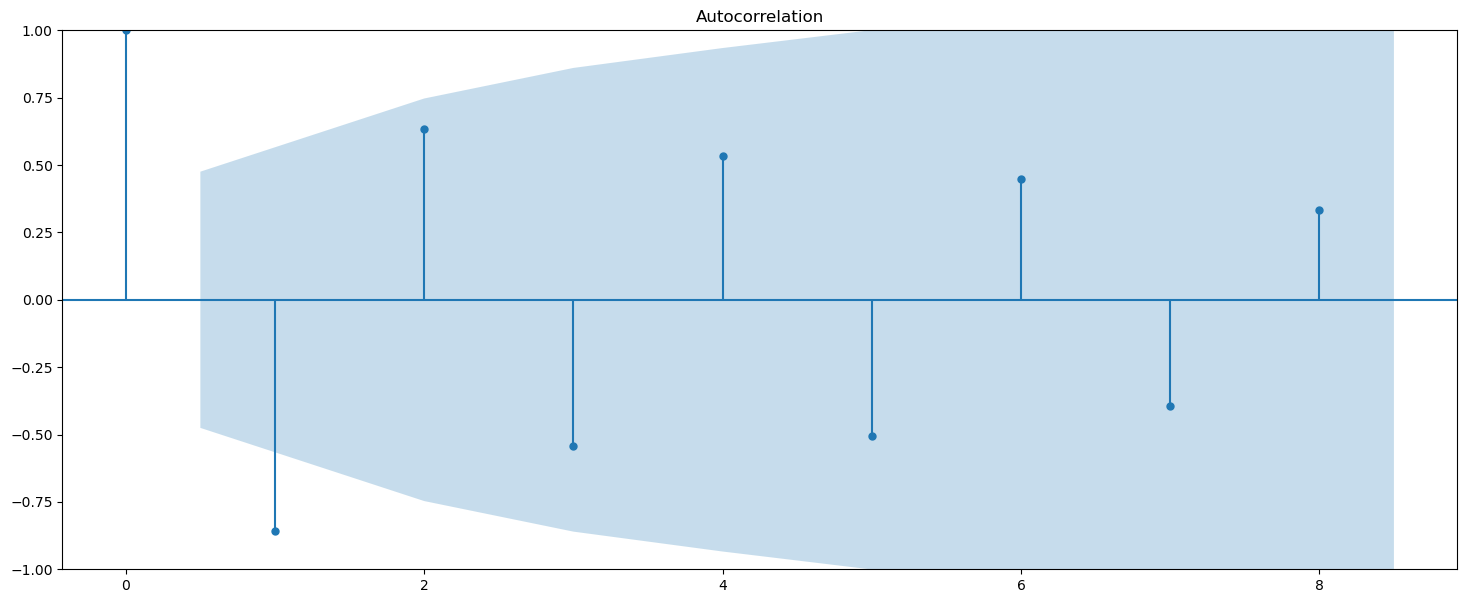

In [37]:
# Plot of autocorrelations
plot_acf(df_production_7)
plt.show()

##### Comments
- The plot suggests reduced autocorrelation.

## 6.3 Stationary Testing

In [38]:
# Define the function
def dickey_fuller(timeseries): 

# Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test
dickey_fuller(df_production_7['Average Production'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.157692
p-value                         0.221958
Number of Lags Used             6.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


##### Comments
- At a significance level of 5%, the test statistic is smaller than the critical value and the null hypothesis can be rejected.
- There is not a unit root in the data, and the data is stationary.